# Task 4.10

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1 Importing data

In [2]:
df_all = pd.read_pickle("../02 Data/Prepared Data/ords_prods_all_updated.pkl")
df_all.head()

user_id first_name last_name  gender     state  age date_joined  \
0   26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1   26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2   26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3   26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4   26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   n_dependants fam_status  income  ...  order_hour_of_day  \
0             3    married  165665  ...                  9   
1             3    married  165665  ...                 15   
2             3    married  165665  ...                 15   
3             3    married  165665  ...                  9   
4             3    married  165665  ...                 11   

  days_since_last_order  product_id  add_to_cart_order  reordered  \
0                  30.0         196                  2          0   
1                  11.0         196                  1          1   
2                  10.0         196                  2          1   
3                  14.0       38928                  1          0   
4                  30.0       38928                  1          1   

   Unnamed: 0_y              product_name  aisle_id  department_id  prices  
0           195                      Soda        77              7     9.0  
1           195                      Soda        77              7     9.0  
2           195                      Soda        77              7     9.0  
3         38932  0% Greek Strained Yogurt       120             16    12.6  
4         38932  0% Greek Strained Yogurt       120             16    12.6  

[5 rows x 24 columns]

In [3]:
df_all.shape

(32404859, 24)

## 2 Handling PII data

In [4]:
df_all = df_all.drop(columns = ['first_name'])
df_all = df_all.drop(columns = ['last_name'])

In [5]:
df_all.shape

(32404859, 22)

## 3 Create Regional Segmentation of Data

### 3a Defining Regions

In [6]:
Notheast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
df_all.loc[df_all['state'].isin(Notheast), 'region'] = 'Northeast'
df_all.loc[df_all['state'].isin(South), 'region'] = 'South'
df_all.loc[df_all['state'].isin(West), 'region'] = 'West'
df_all.loc[df_all['state'].isin(Midwest), 'region'] = 'Midwest'

In [8]:
df_all.shape

(32404859, 23)

In [9]:
df_all.head(10)

user_id  gender     state  age date_joined  n_dependants fam_status  income  \
0   26711  Female  Missouri   48    1/1/2017             3    married  165665   
1   26711  Female  Missouri   48    1/1/2017             3    married  165665   
2   26711  Female  Missouri   48    1/1/2017             3    married  165665   
3   26711  Female  Missouri   48    1/1/2017             3    married  165665   
4   26711  Female  Missouri   48    1/1/2017             3    married  165665   
5   26711  Female  Missouri   48    1/1/2017             3    married  165665   
6   26711  Female  Missouri   48    1/1/2017             3    married  165665   
7   26711  Female  Missouri   48    1/1/2017             3    married  165665   
8   26711  Female  Missouri   48    1/1/2017             3    married  165665   
9   26711  Female  Missouri   48    1/1/2017             3    married  165665   

   order_id eval_set  ...  days_since_last_order  product_id  \
0   2543867    prior  ...                   30.0         196   
1   1285508    prior  ...                   11.0         196   
2   2578584    prior  ...                   10.0         196   
3    423547    prior  ...                   14.0       38928   
4   2524893    prior  ...                   30.0       38928   
5   2984525    prior  ...                   19.0       38928   
6   2505178    prior  ...                   21.0       38928   
7   1285508    prior  ...                   11.0       38928   
8   2578584    prior  ...                   10.0       38928   
9    518967    prior  ...                    NaN        6184   

   add_to_cart_order  reordered  Unnamed: 0_y              product_name  \
0                  2          0           195                      Soda   
1                  1          1           195                      Soda   
2                  2          1           195                      Soda   
3                  1          0         38932  0% Greek Strained Yogurt   
4                  1          1         38932  0% Greek Strained Yogurt   
5                  1          1         38932  0% Greek Strained Yogurt   
6                  2          1         38932  0% Greek Strained Yogurt   
7                  3          1         38932  0% Greek Strained Yogurt   
8                  1          1         38932  0% Greek Strained Yogurt   
9                  1          0          6184               Clementines   

   aisle_id  department_id prices   region  
0        77              7    9.0  Midwest  
1        77              7    9.0  Midwest  
2        77              7    9.0  Midwest  
3       120             16   12.6  Midwest  
4       120             16   12.6  Midwest  
5       120             16   12.6  Midwest  
6       120             16   12.6  Midwest  
7       120             16   12.6  Midwest  
8       120             16   12.6  Midwest  
9        32              4    4.3  Midwest  

[10 rows x 23 columns]

In [10]:
df_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
df_all.keys()

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', 'region'],
      dtype='object')

### 3b Determine spending habit difference

In [12]:
# Creating spending flag: low spender < 10, high. spender >= 10 (mean purchase price)
df_all.loc[df_all['prices'] < 10, 'spending_flag'] = 'Low spender'
df_all.loc[df_all['prices'] >= 10, 'spending_flag'] = 'High spender'

In [13]:
crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna=False)

In [14]:
crosstab

spending_flag  High spender  Low spender
region                                  
Midwest             2497034      5100291
Northeast           1875170      3847566
South               3549625      7242260
West                2722093      5570820

## 4 Creating an Exclusion Flag

In [15]:
# Group data by "user_id" column, generate maximum orders for each user, create "max_order column" for aggregation results
df_all['max_order'] = df_all.groupby(['user_id'])['order_number'].transform(np.max)

In [16]:
df_all.loc[df_all['max_order'] <= 5, 'activity_loc'] = 'low activity customer'
df_all.loc[df_all['max_order'] >5, 'activity_loc'] = 'high activity customer'

In [17]:
# Checking results then creating df with only the "low activity customers"
df_all['activity_loc'].value_counts(dropna=False)

high activity customer    30171424
low activity customer      2233435
Name: activity_loc, dtype: int64

### Export data based on customer activity

#### Export "low actiivity customer"

In [18]:
df_low_activity=df_all[df_all['activity_loc'] == 'low activity customer']
df_low_activity.shape

(2233435, 26)

In [19]:
df_low_activity['max_order'].max()

5

In [20]:
df_low_activity.to_pickle('../02 Data/Prepared Data/Low Activity Customers.pkl')

#### Export "high activity customer"

In [21]:
df_all_high = df_all[df_all['activity_loc'] == 'high activity customer']
df_all_high.shape

(30171424, 26)

In [22]:
df_all_high['max_order'].min()

6

In [23]:
df_all_high.to_pickle('../02 Data/Prepared Data/High Activity Customers.pkl')

## 5 Creating a profile variable based on age, income, certain goods in the "department_id" column, and number of dependents


In [24]:
pd.options.display.max_columns=None

In [25]:
df_all_high.head()

user_id  gender     state  age date_joined  n_dependants fam_status  income  \
0   26711  Female  Missouri   48    1/1/2017             3    married  165665   
1   26711  Female  Missouri   48    1/1/2017             3    married  165665   
2   26711  Female  Missouri   48    1/1/2017             3    married  165665   
3   26711  Female  Missouri   48    1/1/2017             3    married  165665   
4   26711  Female  Missouri   48    1/1/2017             3    married  165665   

   order_id eval_set  order_number  orders_day_of_week  order_hour_of_day  \
0   2543867    prior             5                   1                  9   
1   1285508    prior             7                   5                 15   
2   2578584    prior             8                   1                 15   
3    423547    prior             2                   2                  9   
4   2524893    prior             3                   3                 11   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                   30.0         196                  2          0   
1                   11.0         196                  1          1   
2                   10.0         196                  2          1   
3                   14.0       38928                  1          0   
4                   30.0       38928                  1          1   

   Unnamed: 0_y              product_name  aisle_id  department_id  prices  \
0           195                      Soda        77              7     9.0   
1           195                      Soda        77              7     9.0   
2           195                      Soda        77              7     9.0   
3         38932  0% Greek Strained Yogurt       120             16    12.6   
4         38932  0% Greek Strained Yogurt       120             16    12.6   

    region spending_flag  max_order            activity_loc  
0  Midwest   Low spender          8  high activity customer  
1  Midwest   Low spender          8  high activity customer  
2  Midwest   Low spender          8  high activity customer  
3  Midwest  High spender          8  high activity customer  
4  Midwest  High spender          8  high activity customer

### Variables:

#### Age

In [26]:
df_all_high['age'].describe()

count    3.017142e+07
mean     4.947082e+01
std      1.848772e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
df_all_high.loc[df_all_high['age'] >=65, 'age_group_loc'] = 'Elderly'

<ipython-input-27-1ec5a1795e4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high.loc[df_all_high['age'] >=65, 'age_group_loc'] = 'Elderly'


In [28]:
df_all_high.loc[df_all_high['age'] <= 33, 'age_group_loc'] = 'Young'

In [29]:
df_all_high.loc[(df_all_high['age'] >= 34) & (df_all_high['age'] <= 64), 'age_group_loc'] = 'Middle Aged'

In [30]:
df_all_high.shape

(30171424, 27)

In [31]:
df_all_high['age_group_loc'].value_counts(dropna=False)

Middle Aged    14623473
Elderly         7989725
Young           7558226
Name: age_group_loc, dtype: int64

#### Income

In [32]:
df_all_high['income'].describe().astype('int32')

count    30171424
mean        99770
std         43183
min         25903
25%         67424
50%         96823
75%        128150
max        593901
Name: income, dtype: int32

In [33]:
df_all_high.loc[df_all_high['income'] >160_000, 'income_group_loc'] = 'High income'

<ipython-input-33-f242300f6476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high.loc[df_all_high['income'] >160_000, 'income_group_loc'] = 'High income'


In [34]:
df_all_high.loc[df_all_high['income'] <= 60_000, 'income_group_loc'] = 'Low income'

In [35]:
df_all_high.loc[(df_all_high['income'] >60_000) & (df_all_high['income'] <= 160_000), 'income_group_loc'] = 'Medium income'

In [36]:
df_all_high['income_group_loc'].value_counts(dropna=False)

Medium income    22468616
Low income        5624253
High income       2078555
Name: income_group_loc, dtype: int64

#### "Department_id"

In [37]:
df_depts = pd.read_csv("../02 Data/Prepared Data/departments_wrangled.csv", index_col=False)
df_depts.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [38]:
df_depts

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

#### Dependants

In [39]:
df_all_high['n_dependants'].value_counts(dropna=False)

3    7576814
0    7539213
2    7531754
1    7523643
Name: n_dependants, dtype: int64

In [40]:
df_all_high.loc[df_all_high['n_dependants'] == 0, 'dep_group_loc'] = 'No dependants'
df_all_high.loc[df_all_high['n_dependants'] > 0, 'dep_group_loc'] = 'Yes dependants'

<ipython-input-40-dd12268173fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high.loc[df_all_high['n_dependants'] == 0, 'dep_group_loc'] = 'No dependants'


In [41]:
df_all_high.head(200)

user_id  gender     state  age date_joined  n_dependants fam_status  \
0     26711  Female  Missouri   48    1/1/2017             3    married   
1     26711  Female  Missouri   48    1/1/2017             3    married   
2     26711  Female  Missouri   48    1/1/2017             3    married   
3     26711  Female  Missouri   48    1/1/2017             3    married   
4     26711  Female  Missouri   48    1/1/2017             3    married   
..      ...     ...       ...  ...         ...           ...        ...   
195  125935  Female      Iowa   40    1/1/2017             0     single   
196  125935  Female      Iowa   40    1/1/2017             0     single   
197  125935  Female      Iowa   40    1/1/2017             0     single   
198  125935  Female      Iowa   40    1/1/2017             0     single   
199  125935  Female      Iowa   40    1/1/2017             0     single   

     income  order_id eval_set  order_number  orders_day_of_week  \
0    165665   2543867    prior             5                   1   
1    165665   1285508    prior             7                   5   
2    165665   2578584    prior             8                   1   
3    165665    423547    prior             2                   2   
4    165665   2524893    prior             3                   3   
..      ...       ...      ...           ...                 ...   
195   42049    644318    prior             1                   3   
196   42049   2970233    prior             2                   6   
197   42049   2677376    prior             4                   6   
198   42049   2509569    prior             8                   3   
199   42049   1987673    prior             9                   0   

     order_hour_of_day  days_since_last_order  product_id  add_to_cart_order  \
0                    9                   30.0         196                  2   
1                   15                   11.0         196                  1   
2                   15                   10.0         196                  2   
3                    9                   14.0       38928                  1   
4                   11                   30.0       38928                  1   
..                 ...                    ...         ...                ...   
195                 20                    NaN         196                  3   
196                 11                   17.0         196                  2   
197                 17                    6.0         196                  1   
198                 11                    8.0         196                  5   
199                 15                   11.0         196                  3   

     reordered  Unnamed: 0_y              product_name  aisle_id  \
0            0           195                      Soda        77   
1            1           195                      Soda        77   
2            1           195                      Soda        77   
3            0         38932  0% Greek Strained Yogurt       120   
4            1         38932  0% Greek Strained Yogurt       120   
..         ...           ...                       ...       ...   
195          0           195                      Soda        77   
196          1           195                      Soda        77   
197          1           195                      Soda        77   
198          1           195                      Soda        77   
199          1           195                      Soda        77   

     department_id  prices   region spending_flag  max_order  \
0                7     9.0  Midwest   Low spender          8   
1                7     9.0  Midwest   Low spender          8   
2                7     9.0  Midwest   Low spender          8   
3               16    12.6  Midwest  High spender          8   
4               16    12.6  Midwest  High spender          8   
..             ...     ...      ...           ...        ...   
195              7     9.0  Midwest   Low spender         18

## 6 - Creating visualizations to show the distribution of profiles

#### Age Group

Text(0, 0.5, 'number of orders')

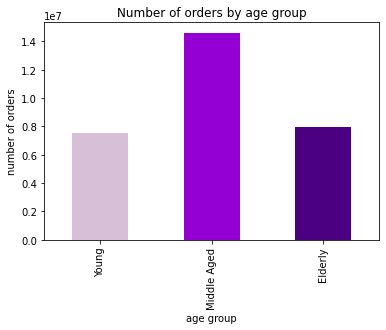

In [42]:
# arranges the age group in an intuitive manner
age_groups_percentage = df_all_high['age_group_loc'].value_counts()
# age_groups_percentage = age_groups_percentage*100/sum(age_groups_percentage)
age_groups_bar = age_groups_percentage[['Young', 'Middle Aged', 'Elderly']].plot.bar(color = ['thistle', 'darkviolet', 'indigo'],title = "Number of orders by age group")
age_groups_bar.set_xlabel("age group")
age_groups_bar.set_ylabel("number of orders")

In [43]:
#Export graph
age_groups_bar.figure.savefig("../04 Analysis/Visualizations/age_groups_bar.png")

#### Income Group

Text(0, 0.5, 'number of orders')

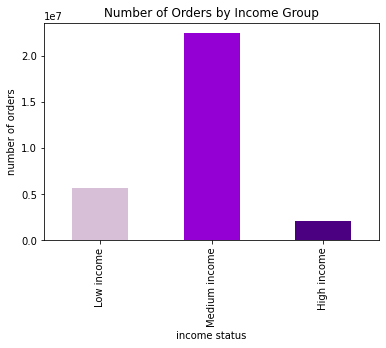

In [44]:
income_group_percentage = df_all_high['income_group_loc'].value_counts()
# income_group_percentage = income_group_percentage*100/sum(income_group_percentage)
order = ['Low income', 'Medium income', 'High income']
income_group_bar = income_group_percentage[order].plot.bar(color = ['thistle', 'darkviolet', 'indigo'], title = 'Number of Orders by Income Group')
income_group_bar.set_xlabel("income status")
income_group_bar.set_ylabel("number of orders")

In [45]:
income_group_bar.figure.savefig("../04 Analysis/Visualizations/income_group_bar.png")

#### Dependants group

In [46]:
df_all_high['dep_group_loc'].value_counts()

Yes dependants    22632211
No dependants      7539213
Name: dep_group_loc, dtype: int64

In [47]:
abc = df_all_high['dep_group_loc'].value_counts()

Text(0, 0.5, 'Number of orders')

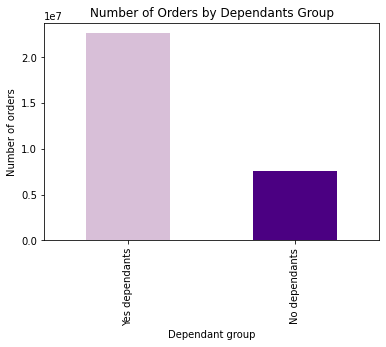

In [48]:
dependant_group_percentage = df_all_high['dep_group_loc'].value_counts()
# dependant_group_percentage = dependant_group_percentage*100/sum(dependant_group_percentage)
dependant_group_bar = dependant_group_percentage.plot.bar(color = ['thistle', 'indigo'], title = 'Number of Orders by Dependants Group')
dependant_group_bar.set_xlabel('Dependant group')
dependant_group_bar.set_ylabel('Number of orders')

In [49]:
dependant_group_bar.figure.savefig('../04 Analysis/Visualizations/dependant_group_bar.png')

#### Region Group

Text(0, 0.5, 'number of orders')

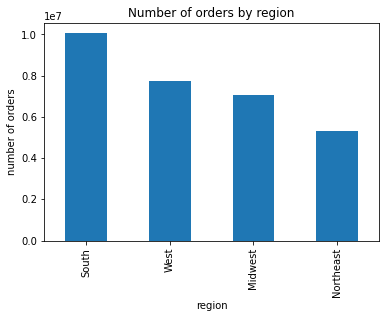

In [50]:
region_groups_percentage = df_all_high['region'].value_counts()
# region_groups_percentage = region_groups_percentage*100/sum(region_groups_percentage)
region_groups_bar = region_groups_percentage.plot.bar(title = "Number of orders by region")
region_groups_bar.set_xlabel("region")
region_groups_bar.set_ylabel("number of orders")

## 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Creating customer level profiles

In [51]:
#Elderly customer profile
df_all_high.loc[(df_all_high['age_group_loc'] == 'Elderly') & (df_all_high['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Older Parent'

<ipython-input-51-757687211d6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_high.loc[(df_all_high['age_group_loc'] == 'Elderly') & (df_all_high['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Older Parent'


In [52]:
#Young parent customer profile
df_all_high.loc[(df_all_high['age_group_loc'] == 'Young') & (df_all_high['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Young Parent'

In [53]:
#Middle-aged parent customer profile
df_all_high.loc[(df_all_high['age_group_loc'] == 'Middle Aged') & (df_all_high['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Middle Age Parent'

In [54]:
#Young Single customers sorted by age group 
df_all_high.loc[(df_all_high['age_group_loc'] == 'Young') & (df_all_high['fam_status'] == 'single'), 'cust_profile'] = 'Young Single'

In [55]:
#Middle-aged Single  customer
df_all_high.loc[(df_all_high['age_group_loc'] == 'Middle Aged') & (df_all_high['fam_status'] == 'single'), 'cust_profile'] = 'Middle Aged Single'

In [56]:
#Older single customer 
df_all_high.loc[(df_all_high['age_group_loc'] == 'Elderly') & (df_all_high['fam_status'] == 'single'), 'cust_profile'] = 'Elderly Single'

#### Aggregating "prices" by age groups

In [57]:
df_all_high.groupby('age_group_loc').agg({'prices':['min', 'mean', 'max']})

prices                    
                 min       mean      max
age_group_loc                           
Elderly          1.0  11.683091  99999.0
Middle Aged      1.0  11.919029  99999.0
Young            1.0  11.924845  99999.0

Text(0, 0.5, 'number of orders')

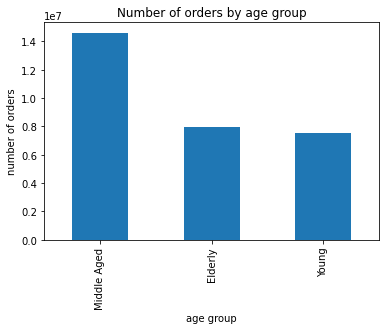

In [58]:
customer_groups_data = df_all_high['age_group_loc'].value_counts()
# region_groups_percentage = region_groups_percentage*100/sum(region_groups_percentage)
customer_groups_bar = customer_groups_data.plot.bar(title = "Number of orders by age group")
customer_groups_bar.set_xlabel("age group")
customer_groups_bar.set_ylabel("number of orders")

#### Aggregating prices by customer profile

In [59]:
df_all_high.groupby('cust_profile').agg({'prices':['min', 'mean', 'max']})

prices                    
                      min       mean      max
cust_profile                                 
Middle Age Parent     1.0  11.890835  99999.0
Middle Aged Single    1.0  12.393191  99999.0
Older Parent          1.0  11.553461  99999.0
Young Parent          1.0  11.820146  99999.0
Young Single          1.0  12.239148  99999.0

Text(0, 0.5, 'number of orders')

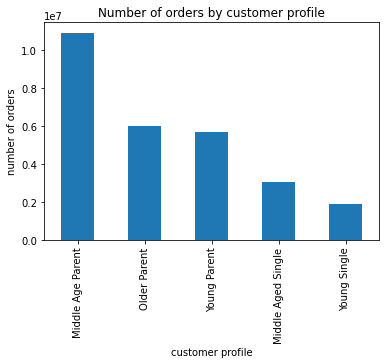

In [60]:
customer_groups_data = df_all_high['cust_profile'].value_counts()
# region_groups_percentage = region_groups_percentage*100/sum(region_groups_percentage)
customer_groups_bar = customer_groups_data.plot.bar(title = "Number of orders by customer profile")
customer_groups_bar.set_xlabel("customer profile")
customer_groups_bar.set_ylabel("number of orders")

#### Aggregating number of dependants by family status

In [61]:
df_all_high.groupby('fam_status').agg({'n_dependants' : ['min', 'mean', 'max']})

n_dependants              
                                          min      mean max
fam_status                                                 
divorced/widowed                            0  0.000000   0
living with parents and siblings            1  1.986320   3
married                                     1  2.003442   3
single                                      0  0.000000   0

Text(0, 0.5, 'number of orders')

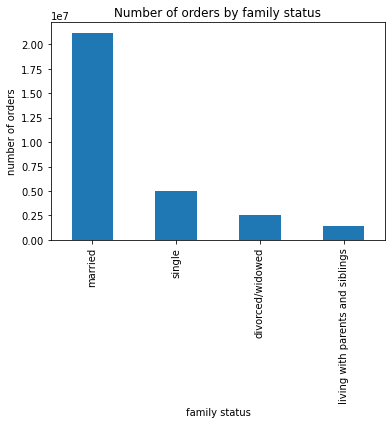

In [62]:
customer_groups_data = df_all_high['fam_status'].value_counts()
# region_groups_percentage = region_groups_percentage*100/sum(region_groups_percentage)
customer_groups_bar = customer_groups_data.plot.bar(title = "Number of orders by family status")
customer_groups_bar.set_xlabel("family status")
customer_groups_bar.set_ylabel("number of orders")

#### Aggregating 'days since last order' by customer profile

In [63]:
df_all_high.groupby('cust_profile').agg({'days_since_last_order':['min', 'mean', 'max']})

days_since_last_order                 
                                     min       mean   max
cust_profile                                             
Middle Age Parent                    0.0  10.645999  30.0
Middle Aged Single                   0.0  10.576035  30.0
Older Parent                         0.0  10.626185  30.0
Young Parent                         0.0  10.648689  30.0
Young Single                         0.0  10.714953  30.0

## 8 - Customer profiles departments/ regions

Text(0, 0.5, 'number of orders')

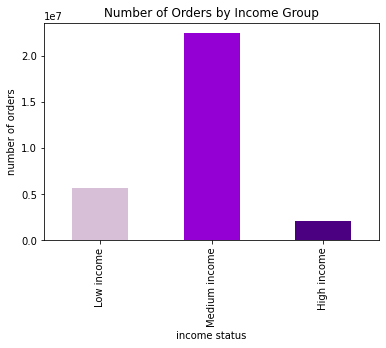

In [64]:
income_group_percentage = df_all_high['income_group_loc'].value_counts()
# income_group_percentage = income_group_percentage*100/sum(income_group_percentage)
order = ['Low income', 'Medium income', 'High income']
income_group_bar = income_group_percentage[order].plot.bar(color = ['thistle', 'darkviolet', 'indigo'], title = 'Number of Orders by Income Group')
income_group_bar.set_xlabel("income status")
income_group_bar.set_ylabel("number of orders")

Grouping customer profiles and regions

In [65]:
profile_region = df_all_high.groupby(['region', 'cust_profile']).size().unstack(fill_value=0)

In [66]:
profile_region

cust_profile  Middle Age Parent  Middle Aged Single  Older Parent  \
region                                                              
Midwest                 2568799              747688       1396794   
Northeast               1941961              505598       1077419   
South                   3627756             1017002       1999785   
West                    2805549              802420       1544547   

cust_profile  Young Parent  Young Single  
region                                    
Midwest            1330559        427937  
Northeast           987832        344045  
South              1905838        643218  
West               1445372        473425

Text(0, 0.5, 'number of orders')

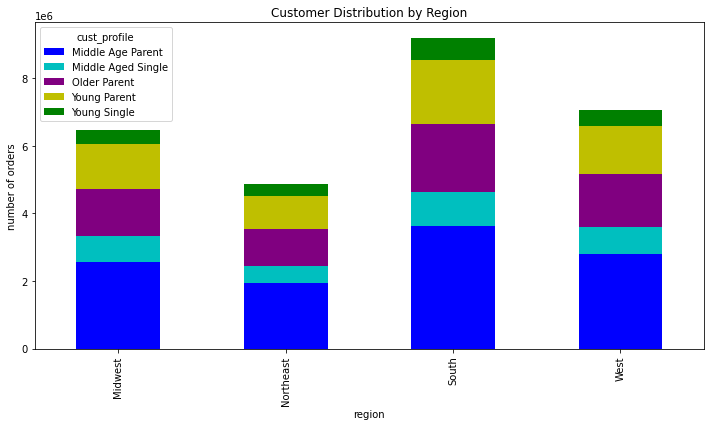

In [67]:
profile_region_bar = profile_region.plot.bar(color = ['blue','c','purple','y','green'], stacked = True, title = 'Customer Distribution by Region', figsize=(12,6))
profile_region_bar.set_ylabel('number of orders')

##### Assigning department names

In [68]:
df_merged = df_all_high.merge(df_depts, how='left', on = 'department_id')

In [69]:
df_merged.head(5)

user_id  gender     state  age date_joined  n_dependants fam_status  income  \
0   26711  Female  Missouri   48    1/1/2017             3    married  165665   
1   26711  Female  Missouri   48    1/1/2017             3    married  165665   
2   26711  Female  Missouri   48    1/1/2017             3    married  165665   
3   26711  Female  Missouri   48    1/1/2017             3    married  165665   
4   26711  Female  Missouri   48    1/1/2017             3    married  165665   

   order_id eval_set  order_number  orders_day_of_week  order_hour_of_day  \
0   2543867    prior             5                   1                  9   
1   1285508    prior             7                   5                 15   
2   2578584    prior             8                   1                 15   
3    423547    prior             2                   2                  9   
4   2524893    prior             3                   3                 11   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                   30.0         196                  2          0   
1                   11.0         196                  1          1   
2                   10.0         196                  2          1   
3                   14.0       38928                  1          0   
4                   30.0       38928                  1          1   

   Unnamed: 0_y              product_name  aisle_id  department_id  prices  \
0           195                      Soda        77              7     9.0   
1           195                      Soda        77              7     9.0   
2           195                      Soda        77              7     9.0   
3         38932  0% Greek Strained Yogurt       120             16    12.6   
4         38932  0% Greek Strained Yogurt       120             16    12.6   

    region spending_flag  max_order            activity_loc age_group_loc  \
0  Midwest   Low spender          8  high activity customer   Middle Aged   
1  Midwest   Low spender          8  high activity customer   Middle Aged   
2  Midwest   Low spender          8  high activity customer   Middle Aged   
3  Midwest  High spender          8  high activity customer   Middle Aged   
4  Midwest  High spender          8  high activity customer   Middle Aged   

  income_group_loc   dep_group_loc       cust_profile  department  
0      High income  Yes dependants  Middle Age Parent   beverages  
1      High income  Yes dependants  Middle Age Parent   beverages  
2      High income  Yes dependants  Middle Age Parent   beverages  
3      High income  Yes dependants  Middle Age Parent  dairy eggs  
4      High income  Yes dependants  Middle Age Parent  dairy eggs

In [70]:
#Grouping departments
profile_depts = df_merged.groupby(['department', 'cust_profile']).size().unstack(fill_value=0)

In [71]:
profile_depts

cust_profile     Middle Age Parent  Middle Aged Single  Older Parent  \
department                                                             
alcohol                      49503               15366         26541   
babies                      149276               41800         78876   
bakery                      395357              111620        218036   
beverages                   910040              257877        502879   
breakfast                   237255               66020        129512   
bulk                         11961                3208          6736   
canned goods                355881              100146        196809   
dairy eggs                 1826637              514746       1004925   
deli                        353529              100568        194921   
dry goods pasta             289613               79321        159297   
frozen                      747799              208922        411100   
household                   249166               67063        137400   
international                89883               25398         49248   
meat seafood                237845               65370        133053   
missing                      22709                6351         12436   
other                        11781                3591          6563   
pantry                      629636              174618        346581   
personal care               151826               41709         80501   
pets                         32304                9118         17875   
produce                    3212241              905704       1769725   
snacks                      979823              274192        535531   

cust_profile     Young Parent  Young Single  
department                                   
alcohol                 28060          8727  
babies                  73501         26046  
bakery                 204998         69180  
beverages              465145        155875  
breakfast              124745         40797  
bulk                     6309          2008  
canned goods           185743         61686  
dairy eggs             958474        316253  
deli                   182936         61575  
dry goods pasta        150583         50667  
frozen                 386704        126082  
household              125820         42289  
international           46879         16152  
meat seafood           123756         39717  
missing                 11994          4159  
other                    6590          2111  
pantry                 325037        108781  
personal care           76430         26141  
pets                    17397          5891  
produce               1657801        555962  
snacks                 510699        168526

Text(0.5, 0, 'department')

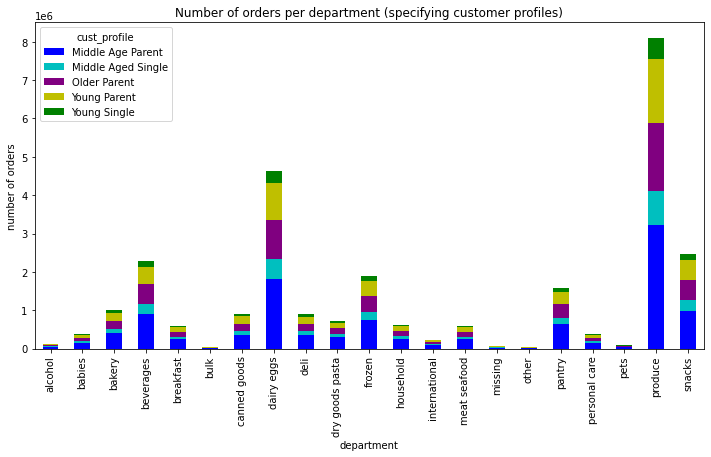

In [72]:
profile_depts_bar = profile_depts.plot.bar(color = ['blue','c','purple','y','green'], stacked = True, title = 'Number of orders per department (specifying customer profiles)',figsize=(12,6))
profile_depts_bar.set_ylabel("number of orders")
profile_depts_bar.set_xlabel("department")


In [73]:
#Grouping departments 
region_depts = df_merged.groupby(['department', 'region']).size().unstack(fill_value=0)

Text(0, 0.5, 'number of orders')

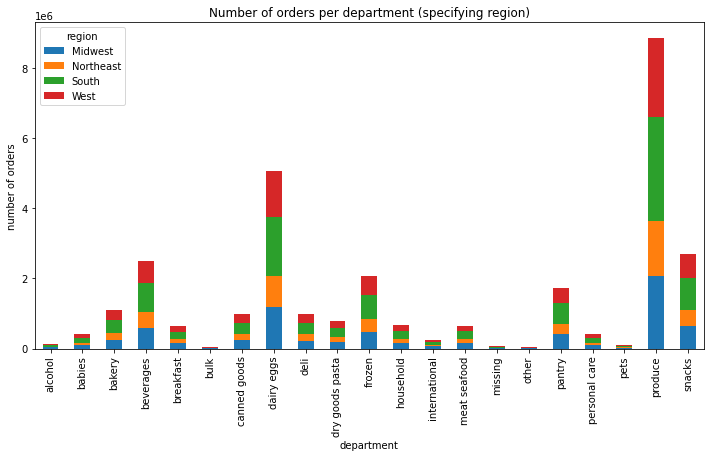

In [74]:
region_depts_bar = region_depts.plot.bar(stacked = True, title = 'Number of orders per department (specifying region)', figsize=(12,6))
region_depts_bar.set_ylabel("number of orders")

#### Creating bar graph for departments

Text(0.5, 0, 'department')

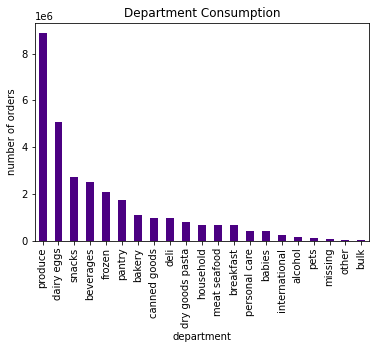

In [75]:
dept_frequency_bar_2 = df_merged['department'].value_counts().plot.bar(color = 'indigo', title = 'Department Consumption')
dept_frequency_bar_2.set_ylabel("number of orders")
dept_frequency_bar_2.set_xlabel('department')

## 9 Export Visualization

In [76]:
profile_region_bar.figure.savefig("../04 Analysis/Visualizations/profile_region_bar_2.png")

#Save graph
profile_depts_bar.figure.savefig("../04 Analysis/Visualizations/profile_depts_bar.png")

#Save graph
region_depts_bar.figure.savefig("../04 Analysis/Visualizations/region_depts_bar.png")

dept_frequency_bar_2.figure.savefig("../04 Analysis/Visualizations/dept_frequency_bar.png")

## 10 Tidy Script and save

In [77]:
#Export df
df_merged.to_pickle("../02 Data/Prepared Data/Orders_products_all_FINAL.pkl")